# **Importing libraries and dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')
clear_output()

In [2]:
path='/content/drive/MyDrive/TFM UNIR/DATA_1.txt'
df = pd.read_csv(path, sep = " ", names = ['EXPENCES','MILES_YEAR', 'DOUBLE_DECKERS', 'FUEL_OIL', 'PROFITS'])

In [3]:
df

,EXPENCES,MILES_YEAR,DOUBLE_DECKERS,FUEL_OIL,PROFITS
0,19.76,6235,100.00,100.00,25.10
1,17.85,46230,43.67,84.53,19.23
2,19.96,7360,65.51,81.57,21.42
3,16.80,28715,45.16,93.33,18.11
4,18.20,21934,49.20,83.07,19.24
5,16.71,1337,74.84,94.99,19.31
6,18.81,17881,70.66,92.34,20.07
7,20.74,2319,63.93,95.08,24.35
8,16.56,18040,14.45,61.24,17.60
9,18.55,1147,68.58,97.90,20.13


In [4]:
df.head()

,EXPENCES,MILES_YEAR,DOUBLE_DECKERS,FUEL_OIL,PROFITS
0,19.76,6235,100.00,100.00,25.10
1,17.85,46230,43.67,84.53,19.23
2,19.96,7360,65.51,81.57,21.42
3,16.80,28715,45.16,93.33,18.11
4,18.20,21934,49.20,83.07,19.24


In [5]:
df.tail()

,EXPENCES,MILES_YEAR,DOUBLE_DECKERS,FUEL_OIL,PROFITS
19,17.51,9450,61.35,86.72,17.07
20,21.17,1028,100.00,100.00,20.61
21,16.92,3848,5.35,65.58,15.73
22,16.96,15656,20.53,93.72,18.70
23,18.24,7725,50.59,96.63,18.99


In [6]:
df.shape

(24, 5)

In [7]:
df['PROFITS'].describe()

count    24.000000
mean     19.821250
std       2.354667
min      15.730000
25%      18.685000
50%      19.275000
75%      20.220000
max      25.750000
Name: PROFITS, dtype: float64

In [8]:
df['PROFITS'].skew()

1.2343682630459254

In [9]:
df['PROFITS'].kurt()

1.7437615702669436

In [10]:
#Outliers detection
def outlier_removal(df, feature):
  #IQR
  Q1 = np.percentile(df[feature], 25, interpolation = 'midpoint')
  Q3 = np.percentile(df[feature], 75, interpolation = 'midpoint')
  IQR = Q3 - Q1
  # Upper bound
  upper = np.where(df[feature] >= (Q3+1.5*IQR))
  # Lower bound
  lower = np.where(df[feature] <= (Q1-1.5*IQR))
 
  #  ''' Removing the Outliers '''
  df.drop(upper[0], inplace = True)
  df.drop(lower[0], inplace = True)

  df.reset_index(drop=True, inplace=True)
 
  print("New Shape: ", df.shape)
  return df

In [11]:
df.describe()

,EXPENCES,MILES_YEAR,DOUBLE_DECKERS,FUEL_OIL,PROFITS
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,18.170000,13748.625000,49.323333,86.988333,19.821250
std,1.435961,12837.546636,24.874852,13.696209,2.354667
min,16.560000,1028.000000,5.350000,56.860000,15.730000
25%,16.950000,3781.250000,31.605000,82.695000,18.685000
50%,17.755000,9794.500000,48.460000,92.935000,19.275000
75%,18.615000,18667.500000,66.065000,96.847500,20.220000
max,21.240000,47009.000000,100.000000,100.000000,25.750000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EXPENCES        24 non-null     float64
 1   MILES_YEAR      24 non-null     int64  
 2   DOUBLE_DECKERS  24 non-null     float64
 3   FUEL_OIL        24 non-null     float64
 4   PROFITS         24 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.1 KB


In [13]:
df.duplicated().sum()

0

In [14]:
outlier_removal(df,'PROFITS')

New Shape:  (20, 5)


,EXPENCES,MILES_YEAR,DOUBLE_DECKERS,FUEL_OIL,PROFITS
0,17.85,46230,43.67,84.53,19.23
1,19.96,7360,65.51,81.57,21.42
2,16.80,28715,45.16,93.33,18.11
3,18.20,21934,49.20,83.07,19.24
4,16.71,1337,74.84,94.99,19.31
5,18.81,17881,70.66,92.34,20.07
6,16.56,18040,14.45,61.24,17.60
7,18.55,1147,68.58,97.90,20.13
8,17.40,2176,53.33,97.50,18.40
9,17.62,13267,25.16,56.86,18.96


In [15]:
def normality_verification(df, feature):
  print('Kursotis:', stats.kurtosis(df[feature]))
  print('Skewness:', stats.skew(df[feature]))	

In [16]:
def test_on_norm(df, column):
    res = stats.shapiro(df[column].values)
    print(f'p-value: {res[1]}.')

In [17]:
for keys in list(df.keys()):
  print(keys)
  normality_verification(df, keys)

EXPENCES
Kursotis: 1.5848062425722604
Skewness: 1.2883438907733495
MILES_YEAR
Kursotis: 0.7075700918682166
Skewness: 1.1209420075684873
DOUBLE_DECKERS
Kursotis: -0.3449302788055797
Skewness: 0.28230277835073553
FUEL_OIL
Kursotis: 0.7751764054545465
Skewness: -1.37539795314723
PROFITS
Kursotis: -0.05546968904476435
Skewness: -0.019880708290030996


In [18]:
for keys in list(df.keys()):
  print(keys)
  test_on_norm(df, keys)

EXPENCES
p-value: 0.017402276396751404.
MILES_YEAR
p-value: 0.014639627188444138.
DOUBLE_DECKERS
p-value: 0.6667511463165283.
FUEL_OIL
p-value: 0.0010746236657723784.
PROFITS
p-value: 0.9704292416572571.


In [19]:
def transformation(df, feature):
  df[feature], lmbda = stats.boxcox(df[feature])
  print('Best lambda parameter = %s' % round(lmbda, 3))
  fig, ax = plt.subplots(figsize=(8, 4))
  prob = stats.boxcox_normplot(df[feature], -10, 10, plot=ax)
  ax.axvline(lmbda, color='r');
  return df

In [20]:
#transformation(df,'EXPENCES')
#transformation(df,'MILES_YEAR')
#transformation(df,'FUEL_OIL')
#transformation(df,'PROFITS')

In [21]:
for keys in list(df.keys()):
  print(keys)
  test_on_norm(df, keys)

EXPENCES
p-value: 0.017402276396751404.
MILES_YEAR
p-value: 0.014639627188444138.
DOUBLE_DECKERS
p-value: 0.6667511463165283.
FUEL_OIL
p-value: 0.0010746236657723784.
PROFITS
p-value: 0.9704292416572571.


In [22]:
df.describe()

,EXPENCES,MILES_YEAR,DOUBLE_DECKERS,FUEL_OIL,PROFITS
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,17.871000,15699.200000,48.936000,88.174000,19.239000
std,1.158883,13230.489439,22.158926,12.660173,1.038191
min,16.560000,1028.000000,14.450000,56.860000,17.070000
25%,16.935000,7056.750000,31.605000,84.165000,18.685000
50%,17.640000,14185.500000,48.460000,92.935000,19.235000
75%,18.255000,20896.000000,66.065000,96.847500,20.017500
max,21.170000,47009.000000,100.000000,100.000000,21.420000


In [23]:
df.corr()

,EXPENCES,MILES_YEAR,DOUBLE_DECKERS,FUEL_OIL,PROFITS
EXPENCES,1.000000,-0.332447,0.685193,0.090661,0.628373
MILES_YEAR,-0.332447,1.000000,-0.582026,-0.120077,-0.231590
DOUBLE_DECKERS,0.685193,-0.582026,1.000000,0.429942,0.457967
FUEL_OIL,0.090661,-0.120077,0.429942,1.000000,0.241001
PROFITS,0.628373,-0.231590,0.457967,0.241001,1.000000


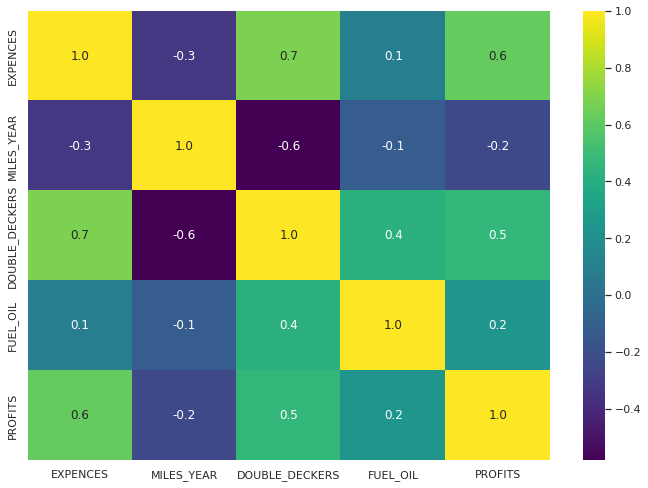

In [24]:
#Seaborn is a Python data visualization library to create plots with the desired data.
#We set the dimensions of the plots using the instructions in this line.
sns.set(rc={'figure.figsize':(11.7,8.27)})
#Through the corr() method we are computing pairwise correlation of independent variables columns 
sns.heatmap(df.corr(), cmap='viridis', annot=True, fmt='.1f')

In [25]:
def plotvariable(df, ft):
  sns.set(rc={'figure.figsize':(15,5)})
  plt.subplot(1,2,1)
  sns.light_palette("seagreen", as_cmap=True)
  sns.histplot(df[ft])
  plt.title(ft)

  plt.subplot(1,2,2)
  sns.boxplot(df[ft], palette="Set3")
  plt.show()

  plt.figure(figsize=(15, 13))
  plt.subplot(2,2,1)
  sns.distplot(df[ft], fit=norm)
  
  plt.subplot(2,2,2)
  stats.probplot(df[ft], plot=plt)

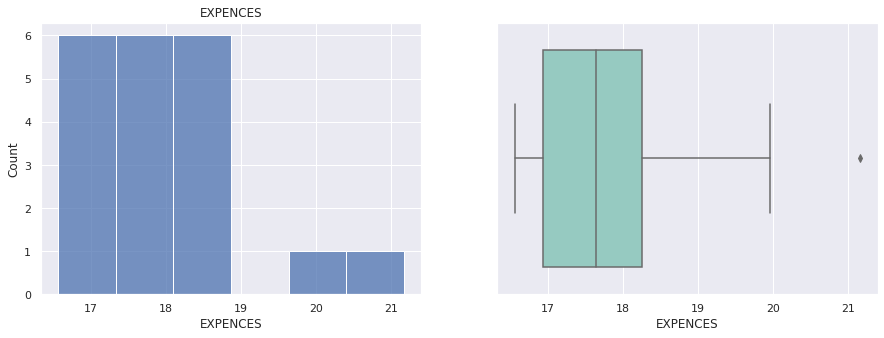

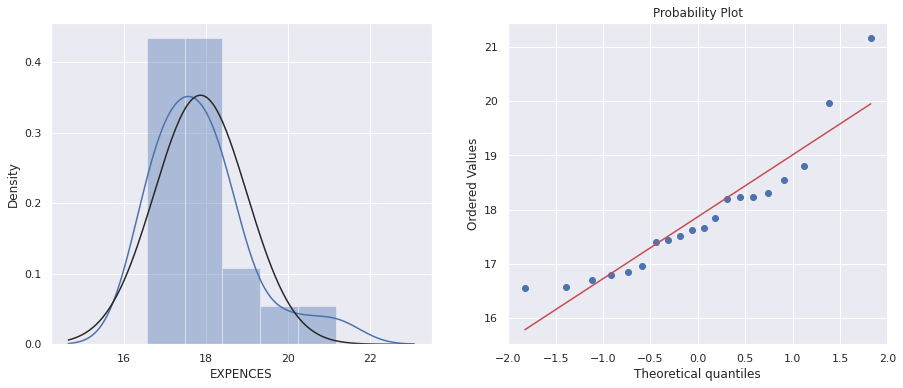

In [26]:
plotvariable(df, 'EXPENCES')

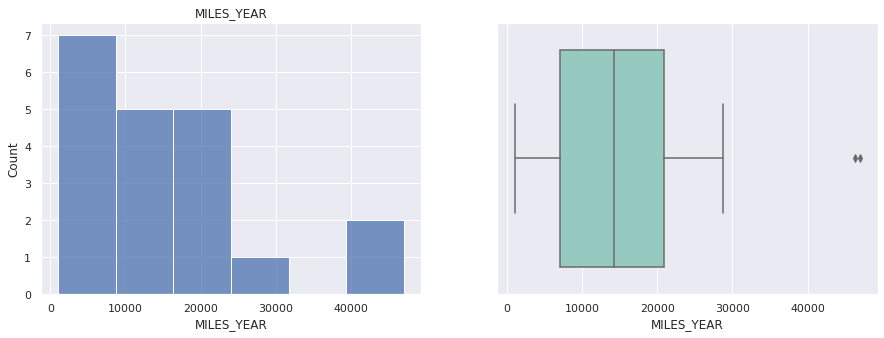

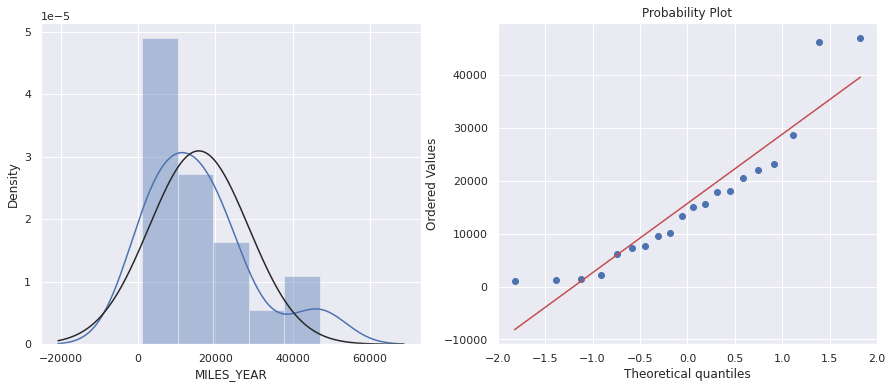

In [27]:
plotvariable(df,'MILES_YEAR')

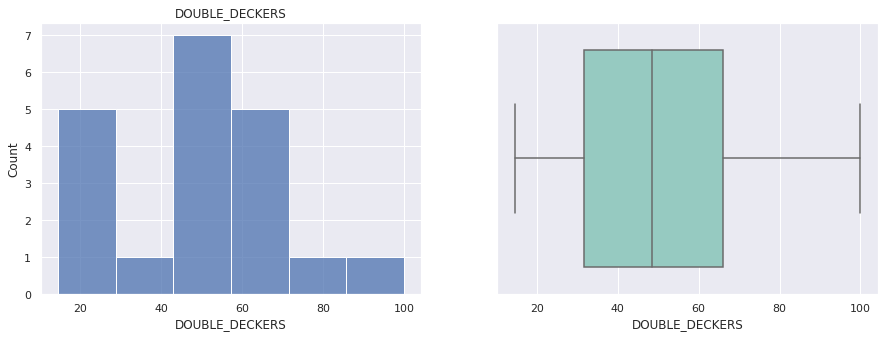

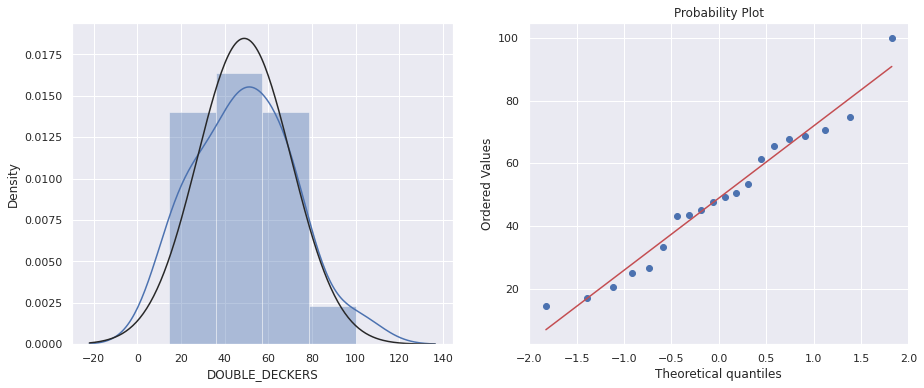

In [28]:
plotvariable(df, 'DOUBLE_DECKERS')

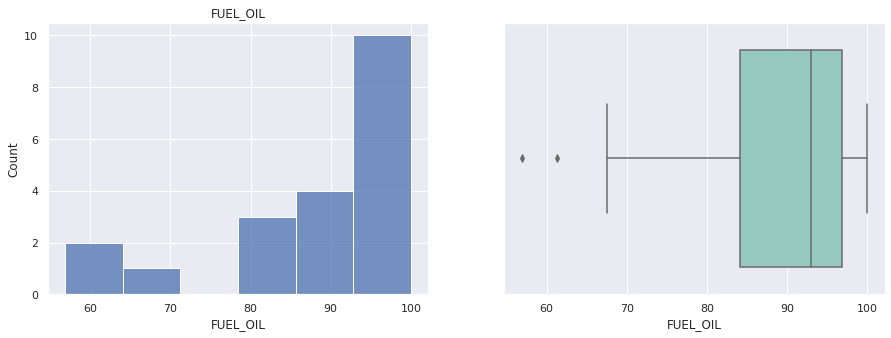

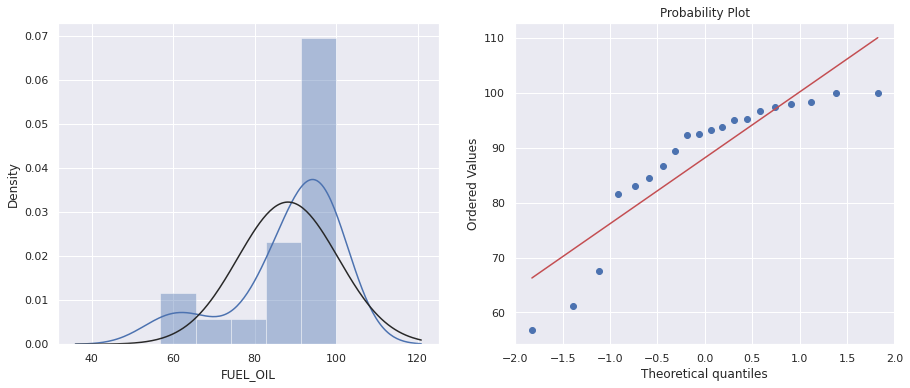

In [29]:
plotvariable(df, 'FUEL_OIL')

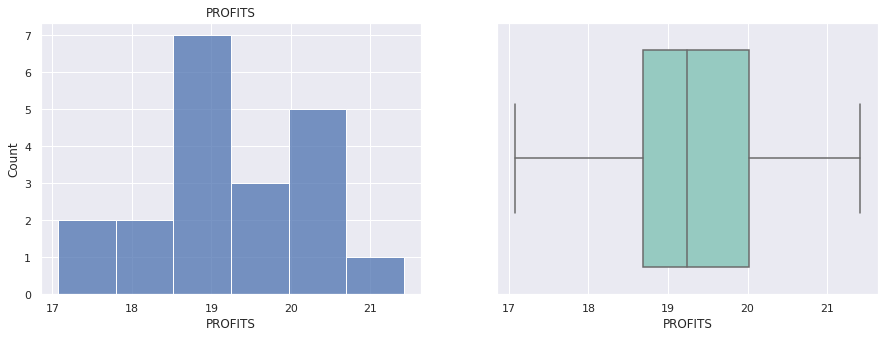

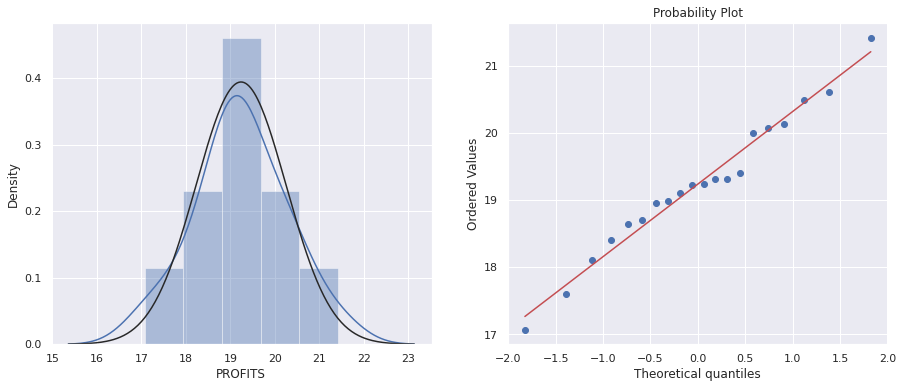

In [30]:
plotvariable(df, 'PROFITS')

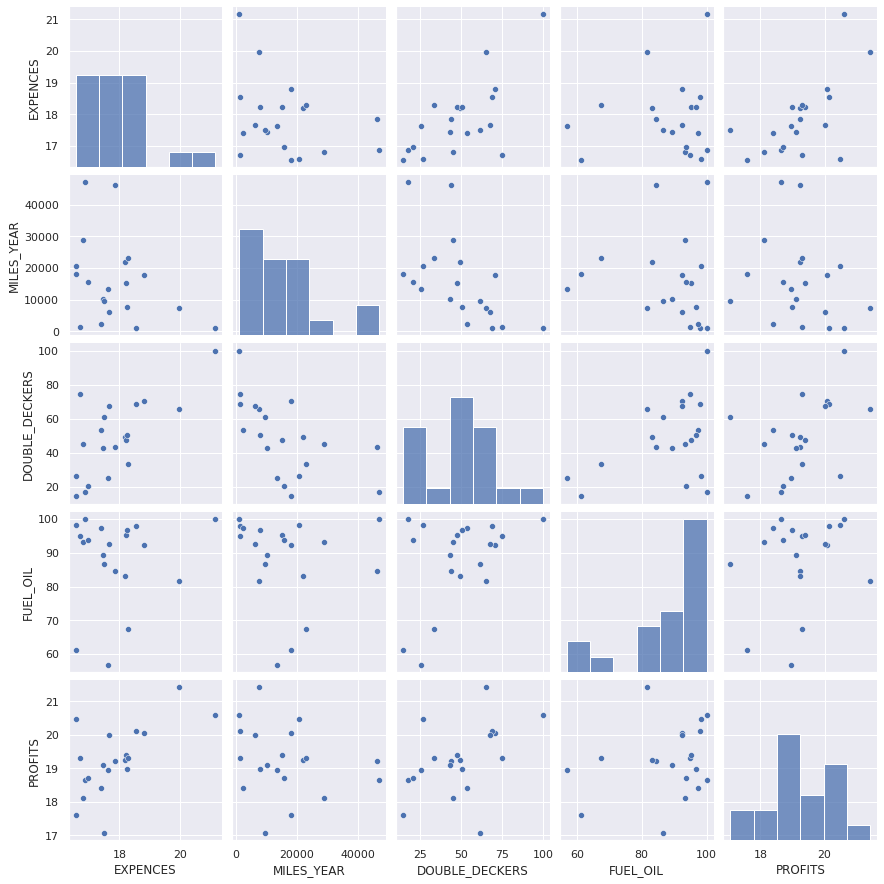

In [31]:
sns.pairplot(df, size = 2.5)
plt.show()

In [32]:
df.corr()

,EXPENCES,MILES_YEAR,DOUBLE_DECKERS,FUEL_OIL,PROFITS
EXPENCES,1.000000,-0.332447,0.685193,0.090661,0.628373
MILES_YEAR,-0.332447,1.000000,-0.582026,-0.120077,-0.231590
DOUBLE_DECKERS,0.685193,-0.582026,1.000000,0.429942,0.457967
FUEL_OIL,0.090661,-0.120077,0.429942,1.000000,0.241001
PROFITS,0.628373,-0.231590,0.457967,0.241001,1.000000


**Spliting the data into train and test**

In [33]:
#This library helps us to split the dataframe into two sets for training and testing.
from sklearn.model_selection import train_test_split

In [34]:
df_LR = df.copy()

In [35]:
#For lineal regression
y_LR = df_LR['PROFITS']
X_LR = df_LR.drop(['PROFITS'], axis=1) # 'FUEL_OIL', 'DOUBLE_DECKERS',  'EXPENCES'
#For penalized regression
y = df_LR['PROFITS']
X = df_LR.drop('PROFITS', axis=1) 

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X_LR.shape[1])]
vif['variable'] = X_LR.columns

In [37]:
vif

,VIF,variable
0,52.928146,EXPENCES
1,3.970378,MILES_YEAR
2,12.978650,DOUBLE_DECKERS
3,50.215044,FUEL_OIL


In [38]:
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X_LR, y_LR, test_size = 0.25, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [40]:
X_train_trans_LR = scaler.fit_transform(X_train_LR)
X_test_trans_LR = scaler.fit_transform(X_test_LR)
X_train_trans = scaler.fit_transform(X_train)
X_test_trans = scaler.fit_transform(X_test)

In [41]:
#The data has been splitted and we show the results using the method shape and the print function.
print(f"No. of training examples: {X_train_trans.shape[0]}")
print(f"No. of training examples response variable: {y_train.shape[0]}")
print(f"No. of testing examples: {X_test_trans.shape[0]}")
print(f"No. of testing examples response variable: {y_test.shape[0]}")

No. of training examples: 15
No. of training examples response variable: 15
No. of testing examples: 5
No. of testing examples response variable: 5


In [42]:
print(f"No. of training examples: {X_train_trans_LR.shape[0]}")
print(f"No. of training examples response variable: {y_train_LR.shape[0]}")
print(f"No. of testing examples: {X_test_trans_LR.shape[0]}")
print(f"No. of testing examples response variable: {y_test_LR.shape[0]}")

No. of training examples: 15
No. of training examples response variable: 15
No. of testing examples: 5
No. of testing examples response variable: 5


# **Application of Linear Regression**

In [43]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_trans_LR,y_train_LR) # Note: sklearn will take care of it.

LinearRegression()

In [44]:
print(f'Los coeficientes obtenidos mediante Linear Regression son: \n {lin_reg.coef_}')
print(f'El intercepto es: \n {lin_reg.intercept_}')

Los coeficientes obtenidos mediante Linear Regression son: 
 [ 0.67064131 -0.31962644 -0.52054201  0.56027141]
El intercepto es: 
 19.191333333333333


In [45]:
y_pred_LR = lin_reg.predict(X_test_trans_LR)
print(y_pred_LR)

[19.05481316 18.78351457 19.60956691 19.39507373 19.11369832]


In [46]:
LR_score = lin_reg.score(X_train_trans_LR, y_train_LR)
LR_score

0.4496522962538376

In [47]:
LR_score = lin_reg.score(X_test_trans_LR, y_test_LR)
LR_score

-0.48738536351979667

# **Application of Linear Regression Ridge**

In [48]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

rid = Ridge()

coefs = []
errors = []

alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in alphas:
    rid.set_params(alpha=a)
    rid.fit(X_train_trans, y_train)
    coefs.append(rid.coef_)
    errors.append(mean_squared_error(y_test, y_pred=rid.predict(X_test_trans)))

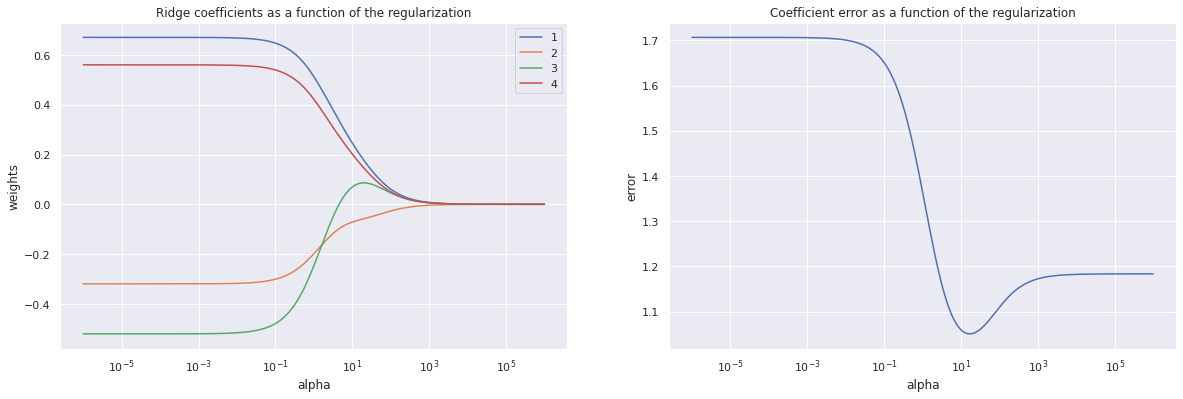

In [49]:
# Display results
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.legend('1234')
plt.axis("tight")

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("error")
plt.title("Coefficient error as a function of the regularization")
plt.axis("tight")

plt.show()

In [50]:
ridge_reg=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100, 1e3, 1e5, 1e6]}
ridge_regressor=GridSearchCV(ridge_reg,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1}
-0.9943809696798045


In [51]:
# ajustar el modelo
ridge_reg = Ridge(alpha = 1, solver = "auto")
ridge_reg.fit(X_train_trans, y_train)

Ridge(alpha=1)

In [52]:
print(f'Los coeficientes obtenidos mediante Ridge Regression son: \n {ridge_reg.coef_}')
print(f'El intercepto es: \n {ridge_reg.intercept_}')

Los coeficientes obtenidos mediante Ridge Regression son: 
 [ 0.51295879 -0.1986781  -0.24722752  0.42213203]
El intercepto es: 
 19.191333333333333


In [53]:
y_pred_R = ridge_reg.predict(X_test_trans)
print(y_pred_R)

[18.8649028  19.05507631 19.52147974 19.33468125 19.18052657]


In [54]:
Ridge_score = ridge_reg.score(X_train_trans, y_train)
Ridge_score

0.4338504394172634

In [55]:
def bar_graphics(coefs_1,coefs_2, coefs_3):
  fig = plt.figure(figsize=(8, 8))
  barWidth = 0.25
  r1 = np.arange(len(coefs_1.coef_))
  r2 = [x + barWidth for x in r1]
  r3 = [x + barWidth for x in r2]
  # pintar las barras----------------------------------------------
  plt.bar(r1, coefs_1.coef_, color = 'cornflowerblue',
  width = barWidth, edgecolor = 'white', label = coefs_1);
  plt.bar(r2, coefs_2.coef_, color = 'cyan',
  width = barWidth, edgecolor = 'white', label = coefs_2);
  plt.bar(r3, coefs_3.coef_, color = 'turquoise',
  width = barWidth, edgecolor = 'white', label = coefs_3);
  plt.xticks([r + barWidth for r in range(len(coefs_1.coef_))], ['B1', 'B2', 'B3', 'B4']);
  plt.legend();
  plt.xlabel('Variable');
  plt.ylabel('Betas values');
  return plt.show(fig)

In [56]:
def bar_graphics_two(coefs_1,coefs_2):
  fig = plt.figure(figsize=(8, 8))
  barWidth = 0.25
  r1 = np.arange(len(coefs_1.coef_))
  r2 = [x + barWidth for x in r1]
  # pintar las barras----------------------------------------------
  plt.bar(r1, coefs_1.coef_, color = 'cornflowerblue',
  width = barWidth, edgecolor = 'white', label = coefs_1);
  plt.bar(r2, coefs_2.coef_, color = 'cyan',
  width = barWidth, edgecolor = 'white', label = coefs_2);
  plt.xticks([r + barWidth for r in range(len(coefs_1.coef_))], ['B1', 'B2', 'B3', 'B4']);
  plt.legend();
  plt.xlabel('Variable');
  plt.ylabel('Betas Values');
  return plt.show(fig)

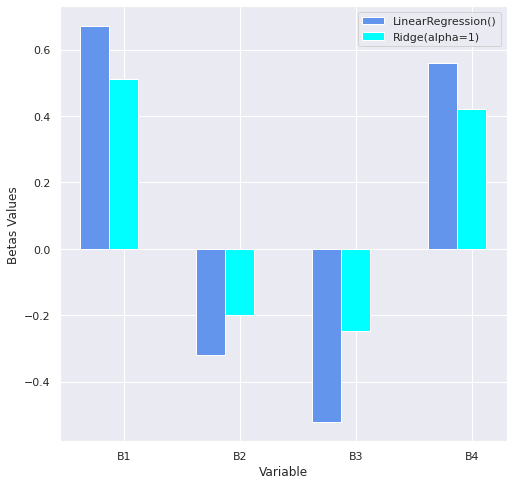

In [57]:
bar_graphics_two(lin_reg, ridge_reg)

# **Application of Linear Regression Lasso Using an Information Criterion**

In [58]:
from sklearn.linear_model import LassoLarsIC
from sklearn.pipeline import make_pipeline

lasso_lars_aic = make_pipeline(LassoLarsIC(criterion="aic", normalize=False)).fit(X_train_trans, y_train)
lasso_lars_bic = make_pipeline(LassoLarsIC(criterion="bic", normalize=False)).fit(X_train_trans, y_train)

In [59]:
results = pd.DataFrame({'alphas': lasso_lars_aic[-1].alphas_, 'AIC criterion': lasso_lars_aic[-1].criterion_,}).set_index('alphas')
alpha_aic = lasso_lars_aic[-1].alpha_

In [60]:
results["BIC criterion"] = lasso_lars_bic[-1].criterion_
alpha_bic = lasso_lars_bic[-1].alpha_

In [61]:
def highlight_min(df):
    df_min = df.min()
    return ["font-weight: bold" if v == df_min else "" for v in df]
results.style.apply(highlight_min)

,AIC criterion,BIC criterion
alphas,,
0.517040207422988,42.462889,42.462889
0.4013733973145881,42.480556,43.188606
0.12517617347542329,39.861553,41.277653
0.04106338364066522,41.289394,43.413545
0.0,42.292558,45.124758


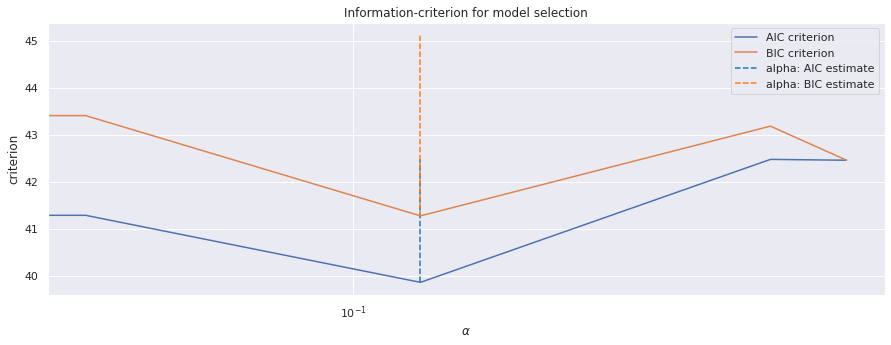

In [62]:
ax = results.plot()
ax.vlines(alpha_aic, results["AIC criterion"].min(), results["AIC criterion"].max(), label="alpha: AIC estimate", linestyles="--", color="tab:blue",)
ax.vlines(alpha_bic, results["BIC criterion"].min(), results["BIC criterion"].max(), label="alpha: BIC estimate", linestyle="--", color="tab:orange",)
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel("criterion")
ax.set_xscale("log")
ax.legend()
_ = ax.set_title(
    f"Information-criterion for model selection")

In [63]:
lasso_lars_aic = LassoLarsIC(criterion='aic', normalize=False).fit(X_train_trans, y_train)
y_pred_lars_aic = lasso_lars_aic.predict(X_test_trans)
y_pred_lars_aic

array([18.81342033, 19.34832915, 19.36809043, 19.11619686, 19.3106299 ])

In [64]:
print(f'Los coeficientes obtenidos mediante Linear Regression LASSO son: \n {lasso_lars_aic.coef_}')
print(f'El intercepto es: \n {lasso_lars_aic.intercept_}')

Los coeficientes obtenidos mediante Linear Regression LASSO son: 
 [0.35071097 0.         0.         0.23504416]
El intercepto es: 
 19.191333333333333


In [65]:
lasso_lars_aic_score = lasso_lars_aic.score(X_train_trans, y_train)
lasso_lars_aic_score

0.363303024642185

In [66]:
lasso_lars_bic = LassoLarsIC(criterion='bic', normalize=False).fit(X_train_trans, y_train)
y_pred_lars_bic = lasso_lars_bic.predict(X_test_trans)
y_pred_lars_bic

array([18.81342033, 19.34832915, 19.36809043, 19.11619686, 19.3106299 ])

In [67]:
print(f'Los coeficientes obtenidos mediante Linear Regression LASSO son: \n {lasso_lars_bic.coef_}')
print(f'El intercepto es: \n {lasso_lars_bic.intercept_}')

Los coeficientes obtenidos mediante Linear Regression LASSO son: 
 [0.35071097 0.         0.         0.23504416]
El intercepto es: 
 19.191333333333333


In [68]:
lasso_lars_bic_score = lasso_lars_bic.score(X_train_trans, y_train)
lasso_lars_bic_score

0.363303024642185

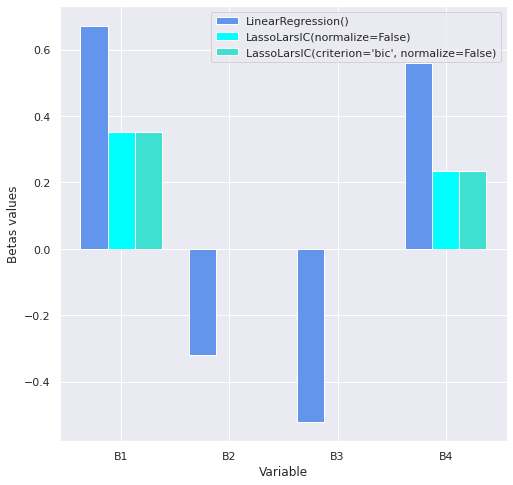

In [69]:
bar_graphics(lin_reg, lasso_lars_aic, lasso_lars_bic)

# **Mean Square Error Calculation**

In [70]:
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
print(f'El mean squared error de la {lin_reg} es igual a:\n {mean_squared_error(y_test_LR, y_pred_LR)}\nMientras que el R2 es igual a: {r2_score(y_test_LR, y_pred_LR)}\n',
      f'El mean squared error de la {ridge_reg} es igual a:\n {mean_squared_error(y_test, y_pred_R)}\nMientras que el R2 es igual a: {r2_score(y_test, y_pred_R)}\n',
      f'El mean squared error de la {lasso_lars_aic} es igual a:\n {mean_squared_error(y_test, y_pred_lars_aic)}\nMientras que el R2 es igual a: {r2_score(y_test, y_pred_lars_aic)}\n',
      f'El mean squared error de la {lasso_lars_bic} es igual a:\n {mean_squared_error(y_test, y_pred_lars_bic)}\nMientras que el R2 es igual a: {r2_score(y_test, y_pred_lars_bic)}\n')

El mean squared error de la LinearRegression() es igual a:
 1.7065902688538936
Mientras que el R2 es igual a: -0.48738536351979667
 El mean squared error de la Ridge(alpha=1) es igual a:
 1.3648650664945206
Mientras que el R2 es igual a: -0.18955343888535037
 El mean squared error de la LassoLarsIC(normalize=False) es igual a:
 0.9937123167086405
Mientras que el R2 es igual a: 0.1339261787690884
 El mean squared error de la LassoLarsIC(criterion='bic', normalize=False) es igual a:
 0.9937123167086405
Mientras que el R2 es igual a: 0.1339261787690884



In [72]:
def bar_graphics_predicted_values_two(y_real,y_pred_a):
  fig = plt.figure(figsize=(8, 8))
  barWidth = 0.25
  r1 = np.arange(len(y_real))
  r2 = [x + barWidth for x in r1]
  # pintar las barras----------------------------------------------
  plt.bar(r1, y_real, color = 'cornflowerblue',
  width = barWidth, edgecolor = 'white', label = 'y_real');
  plt.bar(r2, y_pred_a, color = 'cyan',
  width = barWidth, edgecolor = 'white', label = 'y_pred_a');
  plt.xticks([r + barWidth for r in range(len(y_real))], ['y1', 'y2', 'y3', 'y4', 'y5', 'y6']);
  plt.legend();
  plt.xlabel('Variable');
  plt.ylabel('Response Variable Values');
  return plt.show(fig)

In [73]:
def bar_graphics_predicted_values(y_real,y_pred_a, y_pred_b):
  fig = plt.figure(figsize=(8, 8))
  barWidth = 0.25
  r1 = np.arange(len(y_real))
  r2 = [x + barWidth for x in r1]
  r3 = [x + barWidth for x in r2]
  # pintar las barras----------------------------------------------
  plt.bar(r1, y_real, color = 'cornflowerblue',
  width = barWidth, edgecolor = 'white', label = 'y_real');
  plt.bar(r2, y_pred_a, color = 'cyan',
  width = barWidth, edgecolor = 'white', label = 'y_pred_a');
  plt.bar(r3, y_pred_b, color = 'turquoise',
  width = barWidth, edgecolor = 'white', label = 'y_pred_b');
  plt.xticks([r + barWidth for r in range(len(y_real))], ['y1', 'y2', 'y3', 'y4', 'y5', 'y6']);
  plt.legend();
  plt.xlabel('Variable');
  plt.ylabel('Response Variable Values');
  return plt.show(fig)

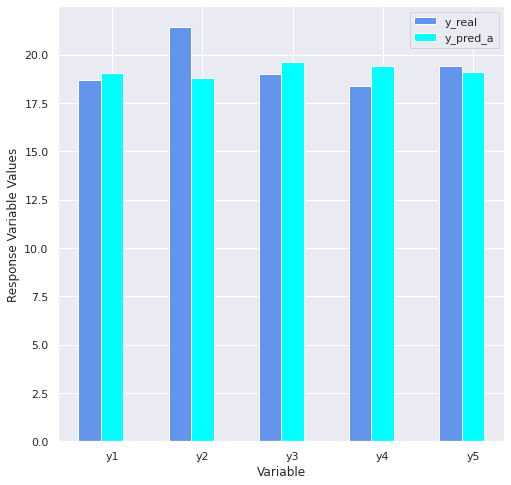

In [74]:
bar_graphics_predicted_values_two(y_test_LR, y_pred_LR)

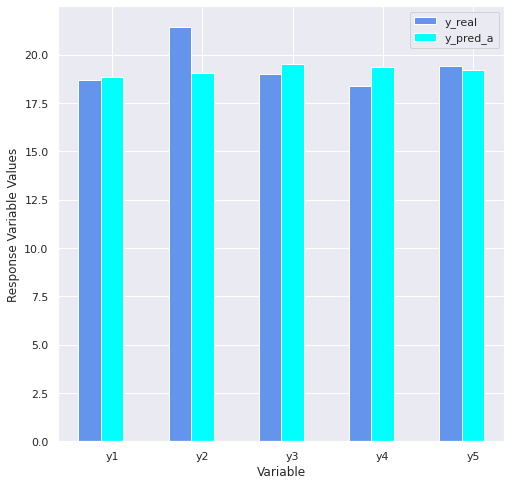

In [75]:
bar_graphics_predicted_values_two(y_test, y_pred_R)

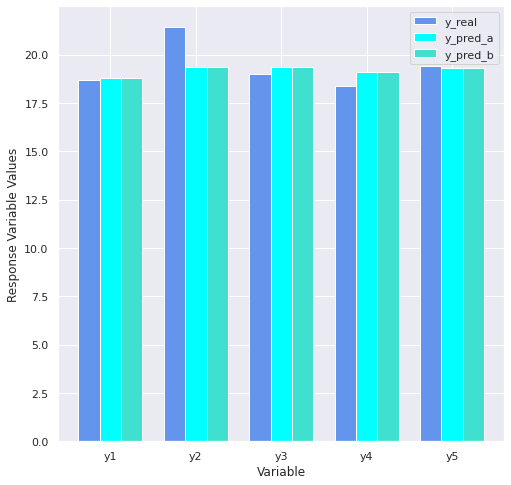

In [76]:
bar_graphics_predicted_values(y_test, y_pred_lars_aic, y_pred_lars_bic)

# **Model Validation**

In [77]:
# Plot looking for linearity and the residuals distribution

def linearity_plot(y_real, y_predicted):

  f = plt.figure(figsize=(14,5))
  ax = f.add_subplot(121)
  sns.scatterplot(y_real, y_predicted, ax=ax,color='green')
  sns.lineplot([min(y_predicted), max(y_predicted)], [min(y_predicted), max(y_predicted)], color = 'red', linewidth = 3)
  ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

  ax = f.add_subplot(122)
  sns.distplot((y_real - y_predicted), ax=ax,color='b')
  ax.axvline((y_real - y_predicted).mean(),color='blue',linestyle='--')
  ax.set_title('Check for Residual normality & mean: \n Residual eror')

  return plt.show(ax)

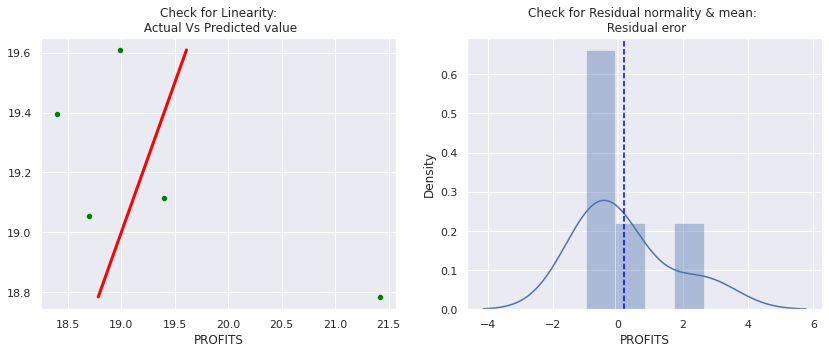

In [78]:
linearity_plot(y_test_LR, y_pred_LR)

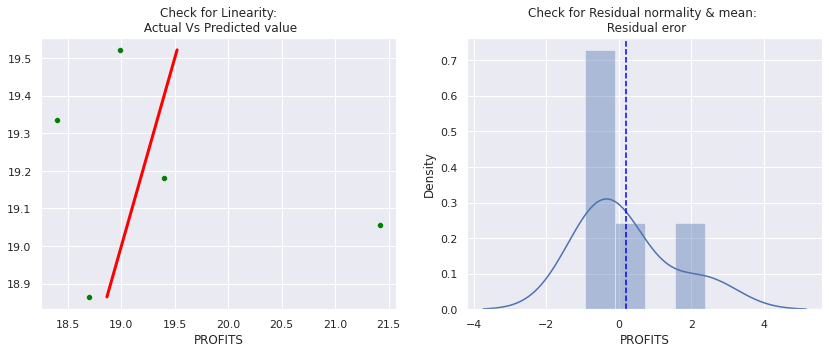

In [79]:
linearity_plot(y_test, y_pred_R)

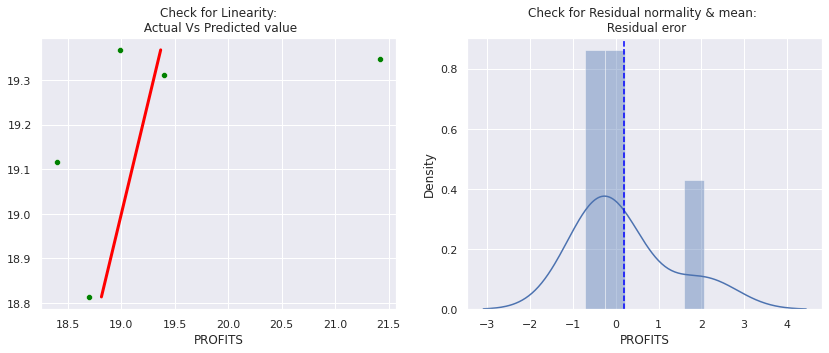

In [80]:
linearity_plot(y_test, y_pred_lars_aic)

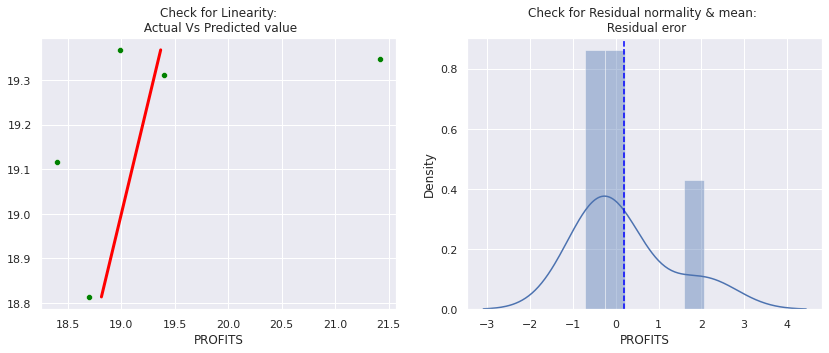

In [81]:
linearity_plot(y_test, y_pred_lars_bic)

In [82]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
def Multivariate_plot(y_test, y_pred):
  f,ax = plt.subplots(1,2,figsize=(14,6))
  import scipy as sp
  _,(_,_,r)= sp.stats.probplot((y_test - y_pred),fit=True,plot=ax[0])
  ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

  #Check for Homoscedasticity
  sns.scatterplot(y = (y_test - y_pred_LR), x= y_pred, ax = ax[1],color='r') 
  ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

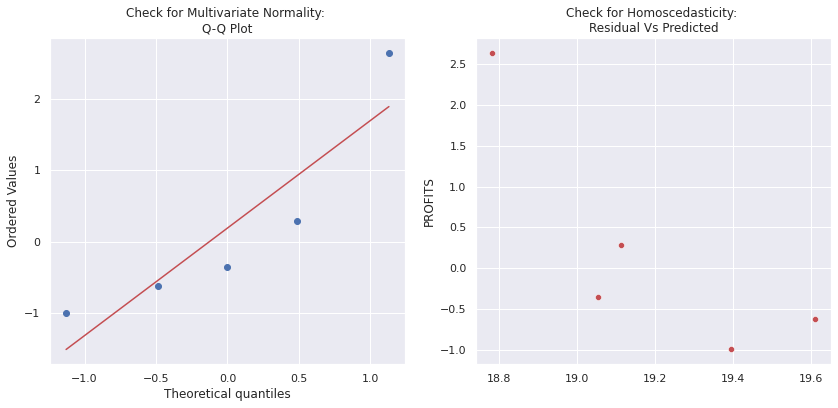

In [83]:
Multivariate_plot(y_test, y_pred_LR)

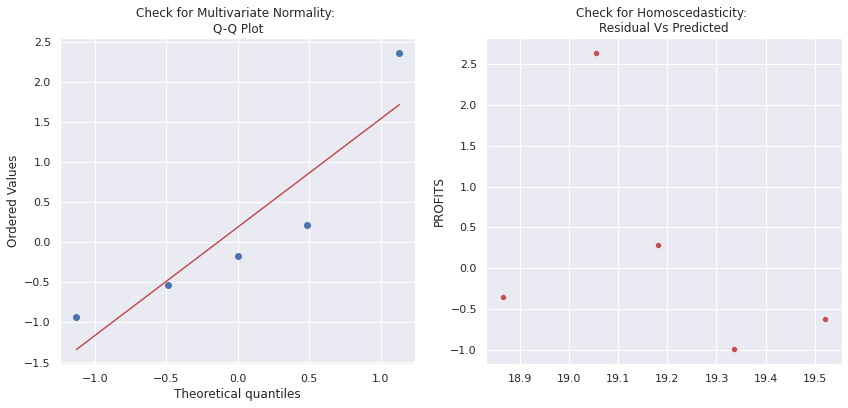

In [84]:
Multivariate_plot(y_test, y_pred_R)

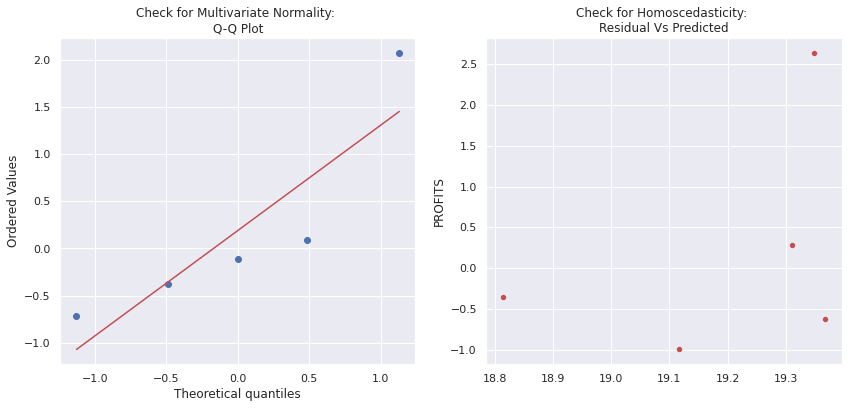

In [85]:
Multivariate_plot(y_test, y_pred_lars_aic)

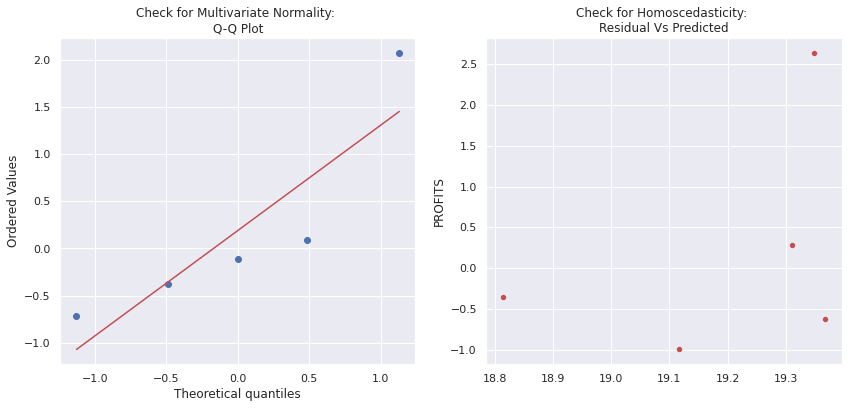

In [86]:
Multivariate_plot(y_test, y_pred_lars_bic)